In [1]:
from Lecture5 import Node, Binomial_Tree
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from importlib import reload  

In [5]:
#lecture 5 slide 12/36:
tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = 500)  
print(tree.present_value(K = 21, r = 0.12))



1.027245341113353


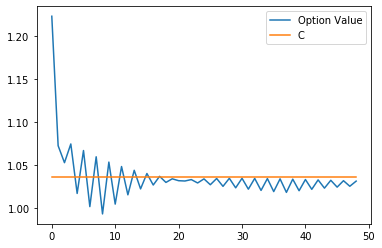

In [7]:
# Visualize process of slide 16/36 by changing n
values = []
for n in range(1,50,1):
    tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = n)  
    values.append(tree.present_value(K = 21, r = 0.12))

pd.DataFrame({'Option Value': values, 'C':sum(values)/len(values)}).plot()

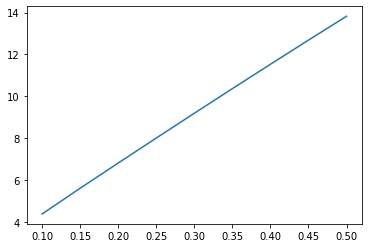

In [8]:
# Visualize changing volatility like in slide 20/36
values = []
vols = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
for vol in vols:
    tree = Binomial_Tree(S = 50, T = 2, o = vol, n = 2)  
    values.append(tree.present_value(K = 52, r = 0.05))
pd.Series(values, index = vols).plot()

# Could plot some nice 3D stuff here...

In [9]:
# American put from slide 24/36
tree = Binomial_Tree(S = 50, T = 5/12, o = 0.4, n = 3)  
print(tree.present_value(K = 50, r = 0.1, call = False, european = False))
# Compare to european:
print(tree.present_value(K = 50, r = 0.1, call = False, european = True))

4.644075163144819
4.482723705669118


In [10]:
# Continuous dividend from slide 26/36
growth_params = {'underlying': 'cont_div_stock', 'q': 0.04}
tree.present_value(K = 50, r = 0.1, call = False, european = False, **growth_params)

4.941715964764493

In [11]:
### LECTURE 6 ####
from scipy.stats import norm
import Lecture6 
reload(Lecture6)
from Lecture6 import brownian_motion, montecarlo

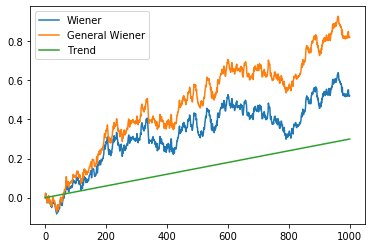

In [12]:
T = 2
N = 1000
vol = 0.3

# Wiener processes like 36/56
brownian_motion(T, N, vol, seed = 1, origin = 0)

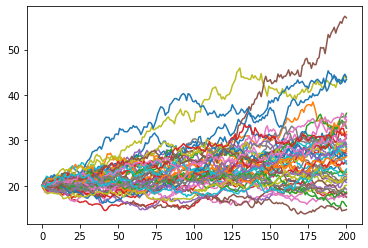

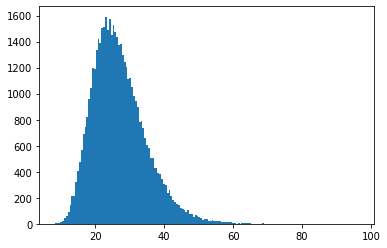

In [23]:
# Montecarlo
mu = 0.15
vol = 0.2
N = 200
T = 2
r = 0.15
S = 20
K = 21

# Like results in slide 51/56
mc = montecarlo(mu, vol, T, r)


# First, two hundred step simulation
mc.plot_step_simulation(S, N)

# Now, thousand times more with one time step.
mc.plot_one_step(S)

In [24]:
# so according to montecarlo (slide 48/56)
print(mc.present_value(S, K))

# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 17)  
print(tree.present_value(K, r))

4.981889799277842
4.924468255992509


In [26]:
# Puts?
print(mc.present_value(S, K, call = False))

# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 50)  
print(tree.present_value(K, r, call = False))

0.5119617284714639
0.5061983603978087


In [39]:
### LECTURE 7 #####
import Lecture7
reload(Lecture7)
from Lecture7 import black_scholes,historic_volatility,implied_volatility

In [40]:
#Slide 3/43

# Montecarlo
mu = 0.13
vol = 0.2

T = 20/52
r = 0.05
S = 49
K = 50

# According to montecarlo
mc = montecarlo(mu, vol, T, r)
print(mc.present_value(S, K))
# So receiving 3 per option... bad deal I guess?


3.2693348182453303


In [41]:
# above according to black scholes (because drift factor not present?)
print(black_scholes(S, K, vol, r, T))

2.4005273232717137


In [42]:
# slide 24/43
S = 30
K = 29
vol = 0.25
r = 0.05
mu = r
T = 4/12

#call
print(black_scholes(S, K, vol, r, T))
#put
print(black_scholes(S, K, vol, r, T, call = False))

2.5251469666999995
1.045819127526908


In [43]:
# Implied volatility from slide 28/43
price =1.875
S = 21
K = 20
r = 0.1 
T = 0.25

implied_volatility(price, S, K, r, T)

0.23451290662982638

In [45]:
# Exercise on slide 43/43
S = 100 
vol = 0.2
T = 1
K = 100
r = 0.07
mu = r
n = [2,3,500]

bs = black_scholes(S, K, vol, r, T)
print(bs)

mc = montecarlo(mu, vol, T, r)
print(mc.present_value(S, K, n_sim = 100000))

bt = []
for i in n:
    tree = Binomial_Tree(S, T, vol, i)  
    bt.append(tree.present_value(K, r))

print(bt)

11.541470170672412
11.550173827341485
[10.617847147540248, 12.068880425017628, 11.537412251593102]
